<a href="https://colab.research.google.com/github/twinkleSojeong/daitgirls_class/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8B%9C%EC%9E%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#데이터 불러오기
data = pd.read_excel('data.xlsx')

In [ ]:
data.head()

,0,title,name,group,class,donation,place,participation,processing,rate,rate_sp
0,1,"우리가 몰랐던 일본의 양심, 다카자네 야스노리 유고집 발간",삶창,0,기업,0,NaN,1,0,0.10,10
1,2,다큐멘터리 사진으로 보는 한일현대사 쟁점 다섯 가지,신동필,1,예술인,0,NaN,1,0,0.91,91
2,3,"잊혀지지 않을 기억, 뮤지컬 단편영화 <언니를 기억해>",언니팀,0,대학생,0,NaN,1,0,0.25,25
3,4,위안부 기억나비 카드지갑/팔찌,위대한 유산,0,사회단체,1,나눔의집,3,1,24.99,2499
4,5,[ 나리 : 진실 ] - '위안부' 기억 뱃지,지지 공방/나눔 그리미,0,고등학생,1,나눔의집,1,1,20.43,2043


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              137 non-null    int64  
 1   title          137 non-null    object 
 2   name           137 non-null    object 
 3   group          137 non-null    int64  
 4   class          137 non-null    object 
 5   donation       137 non-null    int64  
 6   place          80 non-null     object 
 7   participation  137 non-null    int64  
 8   processing     137 non-null    int64  
 9   rate           137 non-null    float64
 10  rate_sp        137 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 11.9+ KB


In [ ]:
data.shape

(137, 11)

In [ ]:
data.describe()

,0,group,donation,participation,processing,rate,rate_sp
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.029197,0.197080,0.576642,1.416058,0.978102,2.483212,248.321168
std,39.742913,0.399253,0.495904,0.703378,0.146887,3.683363,368.336322
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,1.000000,1.000000,0.580000,58.000000
50%,69.000000,0.000000,1.000000,1.000000,1.000000,1.380000,138.000000
75%,103.000000,0.000000,1.000000,2.000000,1.000000,2.370000,237.000000
max,139.000000,1.000000,1.000000,3.000000,1.000000,24.990000,2499.000000


In [ ]:
data = data.drop(0,axis=1)
data = data.drop('rate',axis=1)

In [ ]:
data

,title,name,group,class,donation,place,participation,processing,rate_sp
0,"우리가 몰랐던 일본의 양심, 다카자네 야스노리 유고집 발간",삶창,0,기업,0,NaN,1,0,10
1,다큐멘터리 사진으로 보는 한일현대사 쟁점 다섯 가지,신동필,1,예술인,0,NaN,1,0,91
2,"잊혀지지 않을 기억, 뮤지컬 단편영화 <언니를 기억해>",언니팀,0,대학생,0,NaN,1,0,25
3,위안부 기억나비 카드지갑/팔찌,위대한 유산,0,사회단체,1,나눔의집,3,1,2499
4,[ 나리 : 진실 ] - '위안부' 기억 뱃지,지지 공방/나눔 그리미,0,고등학생,1,나눔의집,1,1,2043
...,...,...,...,...,...,...,...,...,...
132,위안부' 기억하기 프로젝트 [소녀의 우산/거울/수건],희움,0,기업,1,희움씨앗기금,2,1,821
133,"함께 기억해주세요, 일본군'위안부'피해자 '기억'다이어리",모꼬지,0,중학생,1,나눔의집,1,1,461
134,"2019 굿데이 프로젝트 첫번째 발자국, 한아름 키링",김영우,1,기타,1,정의기억연대,3,1,279
135,"엄마, 미안해요",이야기해주세요,0,예술인,0,NaN,1,1,256


In [ ]:
#데이터 정제
data.isnull().sum() #결측치 확인

title             0
name              0
group             0
class             0
donation          0
place            57
participation     0
processing        0
rate_sp           0
dtype: int64

In [ ]:
# 결측값을 0으로 대체
data = data.replace(np.NaN, 0)
data.isnull().sum()

title            0
name             0
group            0
class            0
donation         0
place            0
participation    0
processing       0
rate_sp          0
dtype: int64

In [ ]:
import matplotlib
from matplotlib import font_manager, rc
import platform

Text(0, 0.5, 'frequency')

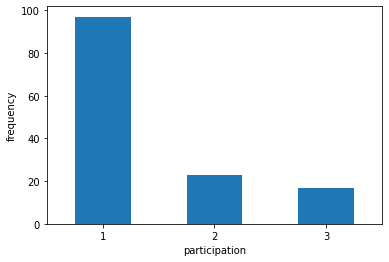

In [ ]:
#특정 컬럼 -> bar로 시각화해서 확인
data['participation'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation =0)
plt.xlabel("participation")
plt.ylabel("frequency")

TypeError: ignored

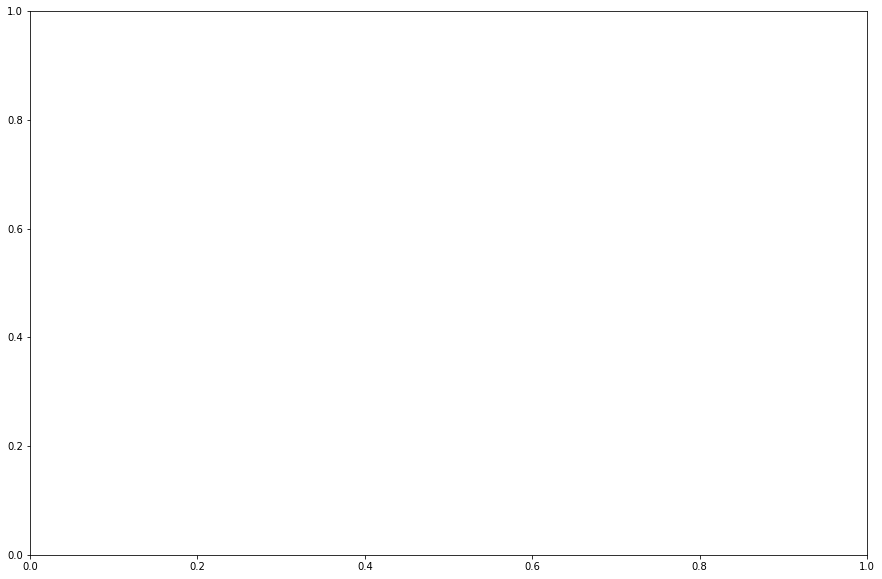

In [ ]:
plt.figure(figsize=(15,10))
boxplot = data.boxplot(column=['rate_sp'], x='rate')
plt.show()

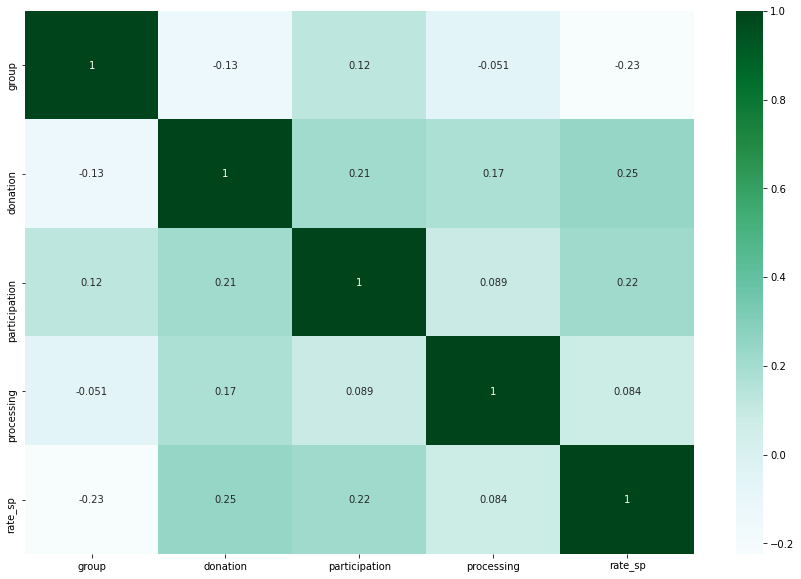

In [ ]:
#상관관계 확인
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='BuGn') 

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 4.1 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 9.5 MB 44.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=5f88b85b93fec823fd77b6efe58c27f157c62fa674df78c8bbe21d79dee501b7
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=14ef2b5c7a92dd1ee4c74fc3937797de4e9fe73298d8b34b710be18fd9205898
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
#상관관계 분석 

import pingouin as pg
ng = pd.read_excel('data.xlsx')

In [ ]:
data

,title,name,group,class,donation,place,participation,processing,rate_sp
0,"우리가 몰랐던 일본의 양심, 다카자네 야스노리 유고집 발간",삶창,0,기업,0,0,1,0,10
1,다큐멘터리 사진으로 보는 한일현대사 쟁점 다섯 가지,신동필,1,예술인,0,0,1,0,91
2,"잊혀지지 않을 기억, 뮤지컬 단편영화 <언니를 기억해>",언니팀,0,대학생,0,0,1,0,25
3,위안부 기억나비 카드지갑/팔찌,위대한 유산,0,사회단체,1,나눔의집,3,1,2499
4,[ 나리 : 진실 ] - '위안부' 기억 뱃지,지지 공방/나눔 그리미,0,고등학생,1,나눔의집,1,1,2043
...,...,...,...,...,...,...,...,...,...
132,위안부' 기억하기 프로젝트 [소녀의 우산/거울/수건],희움,0,기업,1,희움씨앗기금,2,1,821
133,"함께 기억해주세요, 일본군'위안부'피해자 '기억'다이어리",모꼬지,0,중학생,1,나눔의집,1,1,461
134,"2019 굿데이 프로젝트 첫번째 발자국, 한아름 키링",김영우,1,기타,1,정의기억연대,3,1,279
135,"엄마, 미안해요",이야기해주세요,0,예술인,0,0,1,1,256


In [ ]:
# 달성률과 집단의 상관관계
pg.corr(ng.rate, ng.group)

In [ ]:
# 달성률과 기부유무의 상관관계
pg.corr(ng.rate, ng.donation)

In [ ]:
# 달성률과 참여횟수의 상관관계
pg.corr(ng.participation, ng.rate)

In [ ]:
data.head()

,title,name,group,class,donation,place,participation,processing,rate_sp
0,"우리가 몰랐던 일본의 양심, 다카자네 야스노리 유고집 발간",삶창,0,기업,0,0,1,0,10
1,다큐멘터리 사진으로 보는 한일현대사 쟁점 다섯 가지,신동필,1,예술인,0,0,1,0,91
2,"잊혀지지 않을 기억, 뮤지컬 단편영화 <언니를 기억해>",언니팀,0,대학생,0,0,1,0,25
3,위안부 기억나비 카드지갑/팔찌,위대한 유산,0,사회단체,1,나눔의집,3,1,2499
4,[ 나리 : 진실 ] - '위안부' 기억 뱃지,지지 공방/나눔 그리미,0,고등학생,1,나눔의집,1,1,2043


# 가설 2번 참여횟수별 달성률 평균

In [ ]:
# 가설 3번 : 참여횟수 집단 1 (참여횟수가 1번)
par_1 = data.loc[data['participation'] == 1]
par_1 = par_1[['participation', 'rate_sp']]
par_1.head()
par_1.shape

(97, 2)

In [ ]:
# 가설 3번 : 참여횟수 집단2 (참여횟수가 2번)
par_2 = data.loc[data['participation'] == 2]
par_2 = par_2[['participation', 'rate_sp']]
par_2.head()
par_2.shape

(23, 2)

In [ ]:
# 가설 3번 : 참여횟수 집단3 (참여횟수가 3번)
par_3 = data.loc[data['participation'] == 3]
par_3 = par_3[['participation', 'rate_sp']]
par_3.shape

(17, 2)

In [ ]:
par_4 = data.loc[data['participation'] > 1]
par_4 = par_4[['participation', 'rate_sp']]
par_4.shape

(40, 2)

In [ ]:
mean1 = par_1.mean()
mean1

participation      1.000000
rate_sp          213.649485
dtype: float64

In [ ]:
mean4 = par_4.mean()
mean4

participation      2.425
rate_sp          332.400
dtype: float64

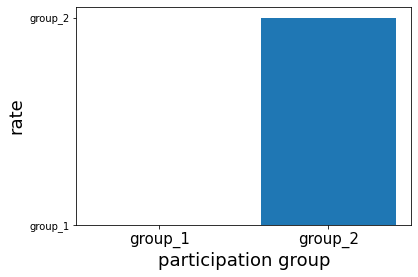

In [ ]:
group_1 = 213.649485
group_2 = 332.4
label = ['group_1','group_2']
index = np.arange(len(label))

plt.bar(index,label)
plt.xlabel('participation group',fontsize=18)
plt.ylabel('rate',fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [ ]:
data.groupby(['participation']).median() 

,0,group,donation,processing,rate,rate_sp
participation,,,,,,
1,65,0,1,1,1.36,136
2,78,0,1,1,1.25,125
3,39,0,1,1,2.79,279


In [ ]:
par_1_rate = par_1[['rate_sp']]
par_1_rate

,rate_sp
0,10
1,91
2,25
4,2043
5,1494
...,...
129,41
130,8
131,1242
133,461


In [ ]:
import numpy as np

In [ ]:
# 가설 4번
data['class'].value_counts()

In [ ]:
# 가설 4번 : 소속별 달성률 평균
cg = data.groupby('class')['participation'].count()
class_group = pd.DataFrame(cg)
class_group

,participation
class,
고등학생,24
기업,20
기타,19
대학생,16
사회단체,10
예술인,40
중학생,8


In [ ]:
class_group.value_counts().sort_index().plot(kind='bar')

In [ ]:
plt.hist(class_group)
plt.show()

## 가설 3번 아노바 분석

In [ ]:
# 가설4번 아노바분석 시도 - 참여횟수별(3개) 달성률 비교
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('rate ~ C(participation)', ng).fit()
anova_lm(model)

In [ ]:
# 참여횟수(1,2,3)별 달성률 아노바분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

one = data.participation == '1'
two = data.participation == '2'
thr = data.participation == '3'

model = ols('rate ~ C(one) * C(two) * C(thr)', ng).fit()
anova_lm(model)

## 참여횟수 vs 달성률 아노바 분석 (재)

In [ ]:
# 등분산 -> 0.05보다 작으므로 귀무가설 기각. 등분산 아님. 아노바 보기.
pg.homoscedasticity(dv='rate_sp', group='participation', data=data)

,W,pval,equal_var
levene,3.826387,0.024207,False


In [ ]:
# 아노바 -> 0.05보다 작으므로 참여횟수에 따라 달성률에 유의한 차이가 있다.
pg.anova(dv='rate_sp', between='participation', data=data, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,participation,1.273555e+06,2,636777.517110,4.967356,0.008297,0.069022
1,Within,1.717779e+07,134,128192.453988,NaN,NaN,NaN


In [ ]:
# 등분산이 아니므로 게임스호웰 -> 모두 p-value가 유의하지 않으므로 차이가 통계적으로 유의미하지 않다.
pg.pairwise_gameshowell(dv='rate_sp', between='participation', data=data)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,213.649485,205.304348,8.345137,63.270432,0.131896,38.238323,0.900000,0.030395
1,1,3,213.649485,504.352941,-290.703457,155.474313,-1.869784,17.412931,0.176986,-0.488325
2,2,3,205.304348,504.352941,-299.048593,161.756769,-1.848755,20.163493,0.179458,-0.579570


# 소속집단 vs 참여횟수 아노바

In [ ]:
# 등분산 -> 0.05보다 작으므로 귀무가설 기각. 등분산 아님. 아노바 보기.
pg.homoscedasticity(dv='participation', group='class', data=data)

,W,pval,equal_var
levene,4.499824,0.000356,False


In [ ]:
# 아노바 -> 0.05보다 작으므로 소속집단에 따라 참여횟수에 유의한 차이가 있다.
pg.anova(dv='participation', between='class', data=data, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,class,10.063619,6,1.677270,3.810574,0.001568,0.149568
1,Within,57.221053,130,0.440162,NaN,NaN,NaN


In [ ]:
# 등분산이 아니므로 게임스호웰 -> 고등학생vs기업
pg.pairwise_gameshowell(dv='participation', between='class', data=data)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,고등학생,기업,1.125000,1.850000,-0.725000,0.207473,-3.494436,23.710431,0.027009,-1.038987
1,고등학생,기타,1.125000,1.631579,-0.506579,0.216615,-2.338609,22.069226,0.270452,-0.704923
2,고등학생,대학생,1.125000,1.125000,0.000000,0.142760,0.000000,24.066036,0.900000,0.000000
3,고등학생,사회단체,1.125000,1.800000,-0.675000,0.298663,-2.260069,10.029754,0.345620,-0.830565
4,고등학생,예술인,1.125000,1.325000,-0.200000,0.113774,-1.757870,61.996561,0.570239,-0.448367
5,고등학생,중학생,1.125000,1.250000,-0.125000,0.177598,-0.703836,9.613917,0.900000,-0.280096
6,기업,기타,1.850000,1.631579,0.218421,0.283648,0.770042,36.791684,0.900000,0.241657
7,기업,대학생,1.850000,1.125000,0.725000,0.232195,3.122377,31.108967,0.053147,1.024004
8,기업,사회단체,1.850000,1.800000,0.050000,0.350334,0.142721,17.324844,0.900000,0.053782
9,기업,예술인,1.850000,1.325000,0.525000,0.215589,2.435190,27.386004,0.222624,0.658243


# 소속집단 vs 달성률 아노바

In [ ]:
data['class'].unique()

array(['기업', '예술인', '대학생', '사회단체', '고등학생', '기타', '중학생'], dtype=object)

In [ ]:
# 등분산 -> 0.05보다 작으므로 귀무가설 기각. 등분산 아님. 아노바 보기.
pg.homoscedasticity(dv='rate_sp', group='class', data=data)

,W,pval,equal_var
levene,3.147879,0.006482,False


In [ ]:
# 아노바 -> 0.05보다 작으므로 소속집단에 따라 달성률에 유의한 차이가 있다.
pg.anova(dv='rate_sp', between='class', data=data, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,class,3.226412e+06,6,537735.343380,4.591521,0.000292,0.174861
1,Within,1.522493e+07,130,117114.860064,NaN,NaN,NaN


In [ ]:
# 등분산이 아니므로 게임스호웰 -> 고등학생vs대학생
pg.pairwise_gameshowell(dv='rate_sp', between='class', data=data)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,고등학생,기업,452.541667,228.15,224.391667,120.845551,1.856847,33.450635,0.518488,0.552089
1,고등학생,기타,452.541667,254.00,198.541667,124.619670,1.593181,35.729989,0.665240,0.480230
2,고등학생,대학생,452.541667,58.75,393.791667,109.660891,3.590995,24.380417,0.021171,1.135962
3,고등학생,사회단체,452.541667,580.40,-127.858333,268.753982,-0.475745,12.620263,0.900000,-0.174834
4,고등학생,예술인,452.541667,133.45,319.091667,109.783521,2.906553,24.508759,0.093555,0.741354
5,고등학생,중학생,452.541667,211.00,241.541667,124.894120,1.933971,29.943342,0.476111,0.769636
6,기업,기타,228.150000,254.00,-25.850000,82.400926,-0.313710,36.036353,0.900000,-0.098450
7,기업,대학생,228.150000,58.75,169.400000,57.318071,2.955438,23.428058,0.086593,0.969255
8,기업,사회단체,228.150000,580.40,-352.250000,251.969350,-1.397987,9.881561,0.771171,-0.526805
9,기업,예술인,228.150000,133.45,94.700000,57.552340,1.645459,24.054826,0.637654,0.444775


# 기부유무와 달성률 t검정

In [ ]:
import scipy.stats

In [ ]:
# 독립표본 t 검정 -> p-value가 0.05보다 작으므로 기부한 집단과 기부하지 않은 집단의 평균 차이가 유의미하다.
dona_y = data.rate_sp[data.donation == 1]
dona_n = data.rate_sp[data.donation == 0]
scipy.stats.ttest_ind(dona_y, dona_n, equal_var=False)

Ttest_indResult(statistic=3.2329970755753465, pvalue=0.0015800686056446247)

# 기부유무와 참여횟수 t검정


In [ ]:
# 독립표본 t 검정 -> p-value가 0.05보다 작으므로 기부한 집단과 기부하지 않은 집단의 평균 차이가 유의미하다.
dona_y = data.participation[data.donation == 1]
dona_n = data.participation[data.donation == 0]
scipy.stats.ttest_ind(dona_y, dona_n, equal_var=False)

Ttest_indResult(statistic=2.7125891392698636, pvalue=0.007562440764395838)

In [ ]:
dona_y.mean()

1.5443037974683544

In [ ]:
dona_n.mean()

1.2413793103448276